[[Fit Statistics]]
    # function evals   = 65
    # data points      = 301
    # variables        = 4
    chi-square         = 11.200
    reduced chi-square = 0.038
    Akaike info crit   = -982.639
    Bayesian info crit = -967.811
[[Variables]]
    amp:     5.04704595 +/- 0.038644 (0.77%) (init= 10)
    decay:   0.02555390 +/- 0.000447 (1.75%) (init= 0.1)
    shift:  -0.10481396 +/- 0.009820 (9.37%) (init= 0)
    omega:   2.00688067 +/- 0.003171 (0.16%) (init= 3)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, omega)              = -0.785 
    C(amp, decay)                =  0.584 
    C(amp, shift)                = -0.119 


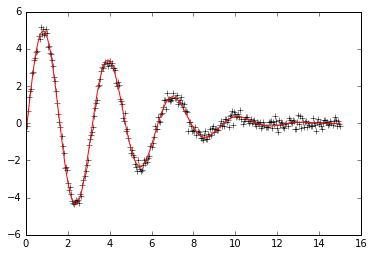

In [2]:
#!/usr/bin/env python
#<examples/doc_basic.py>
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5. * np.sin(2 * x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2) )

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x * omega + shift) * np.exp(-x*x*decay)
    return model - data

# create a set of Parameters
params = Parameters()
params.add('amp',   value= 10,  min=0)
params.add('decay', value= 0.1)
params.add('shift', value= 0.0, min=-np.pi/2., max=np.pi/2)
params.add('omega', value= 3.0)


# do fit, here with leastsq model
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
kws  = {'options': {'maxiter':10}}
result = minner.minimize()


# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
try:
    import pylab
    %matplotlib inline
    pylab.plot(x, data, 'k+')
    pylab.plot(x, final, 'r')
    pylab.show()
except:
    pass

#<end of examples/doc_basic.py>